## TASK 1 - Prediction using Supervised ML

### Author Neha Jaladi

### BASIC INFORMATION ABOUT THE DATASET

In [29]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [30]:
data = pd.read_csv("student_data.csv")
print("Importing Data Successfully")

Importing Data Successfully


In [31]:
print("Dataset")
data.head()

Dataset


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [34]:
data.isnull == True
#checking fot null values

False

In [35]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### EXPLORATORY DATA ANALYSIS¶

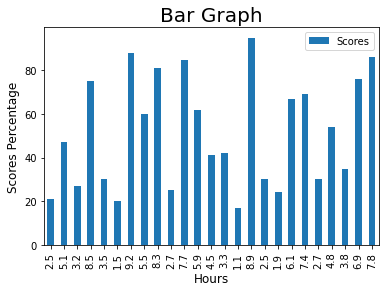

In [36]:
data.plot.bar(x='Hours',y='Scores')
plt.title('Bar Graph',size=20)
plt.ylabel('Scores Percentage', size=12)
plt.xlabel('Hours', size=12)
plt.show()

<AxesSubplot:xlabel='Hours'>

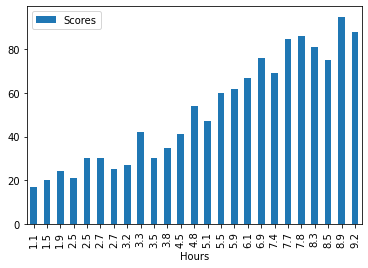

In [37]:
data.sort_values(["Hours"], axis=0,
                 ascending=[True],inplace=True)
data.plot.bar(x='Hours',y='Scores')

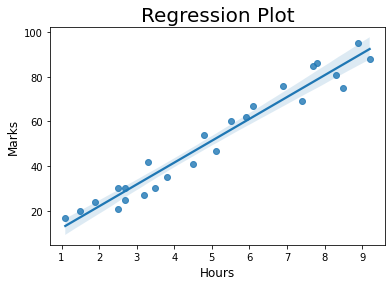

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [38]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks', size=12)
plt.xlabel('Hours', size=12)
plt.show()
print(data.corr())

##### From the graph we could see that the no of hours a student has spent studying is directly proportional to his/her marks.

In [43]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  
# print(X)


In [44]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### TRAINING THE ALGORITHM - LINEAR REGRESSION

In [51]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 

regressor.fit(X_train, y_train) 
print("Training complete.")

Training complete.


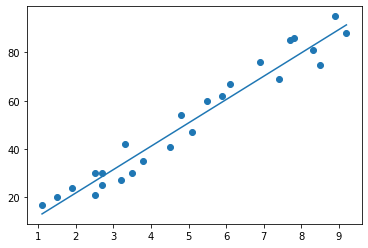

In [52]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# # Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

###### MODEL IS TRAINED

In [53]:
print(X_test) 
print("Predection of Score")
y_pred = regressor.predict(X_test)
print(y_pred)

[[2.7]
 [1.9]
 [7.7]
 [6.1]
 [4.5]]
Predection of Score
[28.6177145  20.88803334 76.92822173 61.46885942 46.0094971 ]


### Comparing the Predicted Marks with the Actual Marks

In [57]:
compare_marks = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  

compare_marks

,Actual,Predicted
0,30,28.617714
1,24,20.888033
2,85,76.928222
3,67,61.468859
4,41,46.009497


### What will be the predicted sore if a student studies for 9.25hrs/day?

In [55]:
hours = [[9.25]]
pred = regressor.predict(hours)
print(pred)

[91.90447898]


### Model Evaluation

In [56]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.621333622532765
